<a href="https://colab.research.google.com/github/jansle2005/Data-Science-Repository/blob/master/07_02_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
# Lê o arquivo xls usando o Pandas
df = pd.read_excel("bandalarga.xlsx")

In [43]:
df.head(20)

,Ano,Mês,UF,Município,Código IBGE,Densidade,Nível Geográfico Densidade,Semestre
0,2022,12,RO,Alta Floresta D'Oeste,1100015,8.958074,Municipio,2
1,2022,12,RO,Ariquemes,1100023,21.363407,Municipio,2
2,2022,12,RO,Cabixi,1100031,5.407539,Municipio,2
3,2022,12,RO,Cacoal,1100049,19.480189,Municipio,2
4,2022,12,RO,Cerejeiras,1100056,8.540527,Municipio,2
5,2022,12,RO,Colorado do Oeste,1100064,2.215211,Municipio,2
6,2022,12,RO,Corumbiara,1100072,3.261486,Municipio,2
7,2022,12,RO,Costa Marques,1100080,4.388471,Municipio,2
8,2022,12,RO,Espigão D'Oeste,1100098,10.578933,Municipio,2
9,2022,12,RO,Guajará-Mirim,1100106,9.058172,Municipio,2


In [44]:
# Cria uma coluna Semetre com base no Mês
df['Semestre'] = (df['Mês']) // 12 + 1

In [55]:
# Cria uma lista com as cidades que deseja filtrar
munparafiltrar = ["Almeirim", "Santarém", "Alenquer","Óbidos", "Laranjal do Jari", "Nova Brasília"]

In [77]:
# Filtra o dataframe pelo conteúdo da coluna "cidade"
df_filtro_Mun = df[df["Município"].isin(munparafiltrar)]

In [91]:
anosparafiltrar=[2016,2017,2018,2019,2020, 2021,2022]
df_filtro_Mun_Ano = df_filtro_Mun[df_filtro_Mun["Ano"].isin(anosparafiltrar)]

In [92]:
df_filtro_Mun_Ano

,Ano,Mês,UF,Município,Código IBGE,Densidade,Nível Geográfico Densidade,Semestre
156,2022,12,PA,Alenquer,1500404,3.760237,Municipio,2
157,2022,12,PA,Almeirim,1500503,9.655152,Municipio,2
232,2022,12,PA,Óbidos,1505106,2.385989,Municipio,2
264,2022,12,PA,Santarém,1506807,4.634834,Municipio,2
302,2022,12,AP,Laranjal do Jari,1600279,11.353294,Municipio,2
...,...,...,...,...,...,...,...,...
462432,2016,1,PA,Alenquer,1500404,0.062200,Municipio,1
462433,2016,1,PA,Almeirim,1500503,0.599305,Municipio,1
462508,2016,1,PA,Óbidos,1505106,0.650033,Municipio,1
462540,2016,1,PA,Santarém,1506807,1.059073,Municipio,1


In [93]:
# Agrupa por Ano, Semestre e UF e calcula a média da Densidade para cada grupo
grouped = df_filtro_Mun_Ano.groupby(['Ano', 'Semestre', 'UF','Município']).mean()

In [94]:
grouped

Mês  Código IBGE  Densidade
Ano  Semestre UF Município                                     
2016 1        AP Laranjal do Jari   6.0    1600279.0   0.106451
              PA Alenquer           6.0    1500404.0   0.066021
                 Almeirim           6.0    1500503.0   0.684912
                 Santarém           6.0    1506807.0   1.204470
                 Óbidos             6.0    1505106.0   0.630518
...                                 ...          ...        ...
2022 2        AP Laranjal do Jari  12.0    1600279.0  11.353294
              PA Alenquer          12.0    1500404.0   3.760237
                 Almeirim          12.0    1500503.0   9.655152
                 Santarém          12.0    1506807.0   4.634834
                 Óbidos            12.0    1505106.0   2.385989

[70 rows x 3 columns]

In [95]:
# Cria uma coluna Ano_Semestre como a concatenação de Ano+Semestre
grouped['Ano_Semestre'] = grouped.index.map(lambda x: str(x[0]) + '_S' + str(x[1]))

In [96]:
grouped

Mês  Código IBGE  Densidade Ano_Semestre
Ano  Semestre UF Município                                                  
2016 1        AP Laranjal do Jari   6.0    1600279.0   0.106451      2016_S1
              PA Alenquer           6.0    1500404.0   0.066021      2016_S1
                 Almeirim           6.0    1500503.0   0.684912      2016_S1
                 Santarém           6.0    1506807.0   1.204470      2016_S1
                 Óbidos             6.0    1505106.0   0.630518      2016_S1
...                                 ...          ...        ...          ...
2022 2        AP Laranjal do Jari  12.0    1600279.0  11.353294      2022_S2
              PA Alenquer          12.0    1500404.0   3.760237      2022_S2
                 Almeirim          12.0    1500503.0   9.655152      2022_S2
                 Santarém          12.0    1506807.0   4.634834      2022_S2
                 Óbidos            12.0    1505106.0   2.385989      2022_S2

[70 rows x 4 columns]

In [97]:
# Apaga agora a coluna inputio Código IBGE
grouped=grouped.drop("Código IBGE", axis=1)

In [98]:
grouped

Mês  Densidade Ano_Semestre
Ano  Semestre UF Município                                     
2016 1        AP Laranjal do Jari   6.0   0.106451      2016_S1
              PA Alenquer           6.0   0.066021      2016_S1
                 Almeirim           6.0   0.684912      2016_S1
                 Santarém           6.0   1.204470      2016_S1
                 Óbidos             6.0   0.630518      2016_S1
...                                 ...        ...          ...
2022 2        AP Laranjal do Jari  12.0  11.353294      2022_S2
              PA Alenquer          12.0   3.760237      2022_S2
                 Almeirim          12.0   9.655152      2022_S2
                 Santarém          12.0   4.634834      2022_S2
                 Óbidos            12.0   2.385989      2022_S2

[70 rows x 3 columns]

In [99]:
# Apaga agora a coluna inputio Código IBGE
grouped=grouped.reset_index()

In [87]:
grouped

,Ano,Semestre,UF,Município,Mês,Densidade,Ano_Semestre
0,2021,1,AP,Laranjal do Jari,6.0,9.079776,2021_S1
1,2021,1,PA,Alenquer,6.0,1.110063,2021_S1
2,2021,1,PA,Almeirim,6.0,6.164295,2021_S1
3,2021,1,PA,Santarém,6.0,8.157679,2021_S1
4,2021,1,PA,Óbidos,6.0,1.684859,2021_S1
5,2021,2,AP,Laranjal do Jari,12.0,9.653551,2021_S2
6,2021,2,PA,Alenquer,12.0,1.630946,2021_S2
7,2021,2,PA,Almeirim,12.0,8.180590,2021_S2
8,2021,2,PA,Santarém,12.0,7.656832,2021_S2
9,2021,2,PA,Óbidos,12.0,2.050578,2021_S2


In [112]:
import datetime
now = datetime.datetime.now()
timeStamp=now.strftime(" Data: %d-%m-%Y , %H:%M:%S UTC")
print(timeStamp)

 Data: 07-02-2023 , 12:50:51 UTC


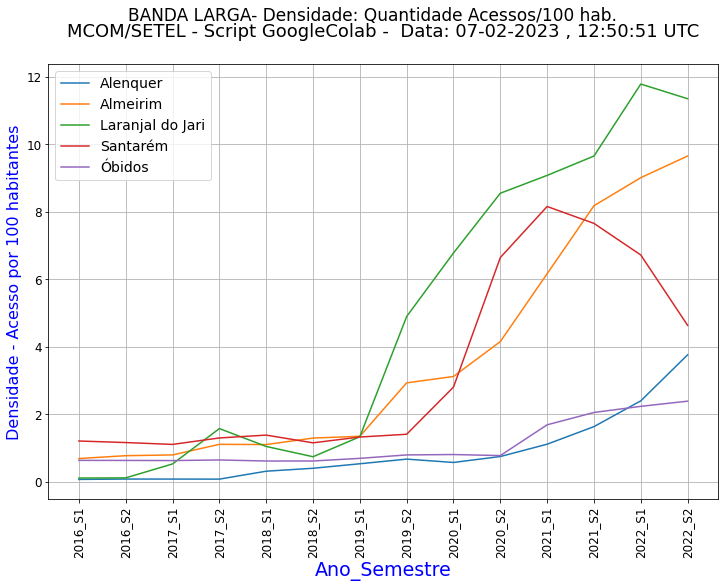

In [120]:
# Plot o gráfico de linha para cada município
# Group the data by year and municipality
matriz = grouped.groupby('Município')
plt.figure(figsize=(12, 8))
# Plot a line chart for each group
for name, group in matriz:
    plt.plot(group['Ano_Semestre'], group['Densidade'], label=name)

plt.xlabel("Ano_Semestre", fontsize=19, color='blue')
plt.ylabel("Densidade - Acesso por 100 habitantes", fontsize=16, color='blue')
plt.legend(loc='best',fontsize=14)
plt.suptitle("BANDA LARGA- Densidade: Quantidade Acessos/100 hab.",fontsize=17)
plt.title("MCOM/SETEL - Script GoogleColab - "+timeStamp, y=1.05, fontsize=18)
plt.grid()

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()
